In [81]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [82]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [83]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [86]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

50.16150425272605 147.79335070078412
-54.93532536947536 63.799479308721374
-54.113098153053876 145.08306325942738
-62.7430472881514 125.1646397621106
61.904872416595765 -124.89106503847424
43.03507572692703 73.11176291746284
57.66918018633169 -37.4105934177592
-36.568991820397066 162.29315419863923
-75.43041863359049 124.84510249496537
-41.38032974736096 -152.4839525814732
-76.29544841250728 -156.02128668912422
-33.01871744852157 -88.25436703893708
-67.76581438661944 111.87781821324984
-19.72255998544955 2.128800641367036
-81.41499436529263 179.26570116857977
-67.43188443317868 -51.81402032106726
-88.83593898788885 60.516151509682516
-76.15773791712374 116.04908686317094
33.524781869251626 -25.101005253328537
2.946332406413674 -11.769403883894455
-65.23375641485939 61.85612964976821
-86.13241927054771 -64.04752308951745
63.09415704802777 76.97860358773141
1.0686040838430273 108.69106783111943
-40.59389398298437 134.59346262871713
-80.29753250469248 -152.15099640738043
63.48604695300253

75.84375825721153 -161.941977097526
86.94856314195101 73.17113532753868
73.35011472959263 19.595607941922225
-42.09534703982567 -36.78099415506824
-43.65804882635598 -78.24147248295303
-26.697324982555784 -160.99155632445735
-46.94657787986466 112.1093280103862
8.988493183667856 57.19995704001269
11.264219873551056 18.769703230913848
-74.28465699094934 -29.395965518076707
30.288376066863208 50.11579608160744
78.53693364216079 -123.95830399698639
-13.626814251489051 -99.69920354940072
8.871112088118863 167.5960284228861
-46.574397347549265 -52.9280076758652
82.2083177561237 -118.40082829426962
-44.92094219761702 -127.92626900884574
29.813443941648103 -91.06919066816403
-23.927805461079913 88.34071444857852
-44.95205009809498 -14.529308497427508
2.2343959216932916 33.13533420017262
-64.81076199433147 -161.6838171788077
-52.54926716570493 70.9113009337571
28.99692336512267 -152.79513223885158
41.79942091651813 -79.81018925851757
33.016298248564 108.68338241323738
88.84510136975146 103.197

-81.89242258694884 68.38672627711881
63.43675021232153 136.42256448483596
25.859642466401823 56.48763789421545
57.17474522036602 5.92678802764766
-48.35130100724264 9.763473878282667
87.47245631382404 117.35166061739858
-40.65009979239233 -141.15077255757598
67.33747437712654 -13.794237295987898
-33.95883784245228 64.03394209808877
89.31084200996705 172.911814303958
5.0983442634110645 123.49409644081487
69.8479647744694 -124.1334790719814
88.9601130261467 -23.730880840108625
-6.6962406770593645 -170.00994951652066
-44.92649282050848 15.228082505266144
-48.86978628554868 -105.4353929033919
80.78464036441466 -111.05006618605441
-12.99899541264098 66.89395921562192
-55.651302091069695 53.36188749280399
-56.32897008615538 13.566601107864585
-83.27521059478839 -158.9633287548392
3.5977515094103296 -47.53537015938028
-49.28484546716301 -145.29622411365062
34.08622486463999 42.676443111582444
-87.07971010498458 -152.7482018428683
70.78772189713442 169.61699713382592
-77.06877003955935 79.5697

In [87]:
from citipy import citipy

In [88]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

583

In [89]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [90]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23f1c39169a5379adc5e4cf389b361bb


In [91]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + ""
city_weather = requests.get(city_url)
city_weather

<Response [400]>

In [92]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [400]>

In [93]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [94]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vostok
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | fort nelson
Processing Record 6 of Set 1 | merke
Processing Record 7 of Set 1 | tasiilaq
Processing Record 8 of Set 1 | te anau
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | kaitangata
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | east london
Processing Record 16 of Set 1 | vila franca do campo
Processing Record 17 of Set 1 | buchanan
Processing Record 18 of Set 1 | novoagansk
Processing Record 19 of Set 1 | pemangkat
Processing Record 20 of Set 1 | port lincoln
Processing Record 21 of Set 1 | igrim
Processing Record 22 of Set 1 | avarua
Processi

Processing Record 39 of Set 4 | praia da vitoria
Processing Record 40 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 41 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 42 of Set 4 | quang ngai
Processing Record 43 of Set 4 | shu
Processing Record 44 of Set 4 | hithadhoo
Processing Record 45 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 46 of Set 4 | arraial do cabo
Processing Record 47 of Set 4 | husavik
Processing Record 48 of Set 4 | mandalgovi
Processing Record 49 of Set 4 | yar-sale
Processing Record 50 of Set 4 | gushikawa
Processing Record 1 of Set 5 | vardo
Processing Record 2 of Set 5 | urdzhar
City not found. Skipping...
Processing Record 3 of Set 5 | faanui
Processing Record 4 of Set 5 | grindavik
Processing Record 5 of Set 5 | salalah
Processing Record 6 of Set 5 | torbay
Processing Record 7 of Set 5 | tiznit
Processing Record 8 of Set 5 | olafsvik
Processing Record 9 of Set 5 | bambous virieux
Processing Re

Processing Record 27 of Set 8 | shirgaon
Processing Record 28 of Set 8 | barmer
Processing Record 29 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 30 of Set 8 | comodoro rivadavia
Processing Record 31 of Set 8 | consett
Processing Record 32 of Set 8 | arkadelphia
Processing Record 33 of Set 8 | dunedin
Processing Record 34 of Set 8 | aljezur
Processing Record 35 of Set 8 | pisco
Processing Record 36 of Set 8 | boffa
Processing Record 37 of Set 8 | bodden town
Processing Record 38 of Set 8 | sabang
Processing Record 39 of Set 8 | shahreza
Processing Record 40 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 41 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 42 of Set 8 | we
City not found. Skipping...
Processing Record 43 of Set 8 | copiapo
Processing Record 44 of Set 8 | sao miguel
Processing Record 45 of Set 8 | alofi
Processing Record 46 of Set 8 | alunitdag
City not found. Skipping...
Processing Record 47 of Set 8 | bandrele
P

Processing Record 9 of Set 12 | takoradi
Processing Record 10 of Set 12 | kasane
Processing Record 11 of Set 12 | ocos
Processing Record 12 of Set 12 | inzer
Processing Record 13 of Set 12 | morondava
Processing Record 14 of Set 12 | petropavl
Processing Record 15 of Set 12 | karamea
City not found. Skipping...
Processing Record 16 of Set 12 | noormarkku
Processing Record 17 of Set 12 | forrest city
Processing Record 18 of Set 12 | sisimiut
Processing Record 19 of Set 12 | sault sainte marie
Processing Record 20 of Set 12 | rawannawi
City not found. Skipping...
Processing Record 21 of Set 12 | ryotsu
Processing Record 22 of Set 12 | el cobre
Processing Record 23 of Set 12 | san juan bautista
Processing Record 24 of Set 12 | umba
Processing Record 25 of Set 12 | samfya
Processing Record 26 of Set 12 | otavalo
Processing Record 27 of Set 12 | iwanai
Processing Record 28 of Set 12 | thomasville
Processing Record 29 of Set 12 | matara
Processing Record 30 of Set 12 | santo tomas
Processing

In [97]:
len(city_data)

525

In [109]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vostok,46.4856,135.8833,67.93,79,100,6.85,RU,2022-07-14 08:47:19
1,Hobart,-42.8794,147.3294,50.05,83,75,4.61,AU,2022-07-14 08:45:46
2,Albany,42.6001,-73.9662,64.81,92,54,3.18,US,2022-07-14 08:45:56
3,Fort Nelson,58.8053,-122.7002,58.59,55,75,8.05,CA,2022-07-14 08:42:59
4,Merke,42.8728,73.1786,89.62,21,0,10.89,KZ,2022-07-14 08:47:20
5,Tasiilaq,65.6145,-37.6368,40.17,73,23,4.16,GL,2022-07-14 08:47:20
6,Te Anau,-45.4167,167.7167,36.30,97,92,4.29,NZ,2022-07-14 08:43:03
7,New Norfolk,-42.7826,147.0587,49.71,86,99,2.35,AU,2022-07-14 08:47:21
8,Mataura,-46.1927,168.8643,35.47,98,94,1.88,NZ,2022-07-14 08:47:21
9,Lebu,-37.6167,-73.6500,40.68,87,77,9.60,CL,2022-07-14 08:43:39


In [110]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [111]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vostok,RU,2022-07-14 08:47:19,46.4856,135.8833,67.93,79,100,6.85
1,Hobart,AU,2022-07-14 08:45:46,-42.8794,147.3294,50.05,83,75,4.61
2,Albany,US,2022-07-14 08:45:56,42.6001,-73.9662,64.81,92,54,3.18
3,Fort Nelson,CA,2022-07-14 08:42:59,58.8053,-122.7002,58.59,55,75,8.05
4,Merke,KZ,2022-07-14 08:47:20,42.8728,73.1786,89.62,21,0,10.89
5,Tasiilaq,GL,2022-07-14 08:47:20,65.6145,-37.6368,40.17,73,23,4.16
6,Te Anau,NZ,2022-07-14 08:43:03,-45.4167,167.7167,36.30,97,92,4.29
7,New Norfolk,AU,2022-07-14 08:47:21,-42.7826,147.0587,49.71,86,99,2.35
8,Mataura,NZ,2022-07-14 08:47:21,-46.1927,168.8643,35.47,98,94,1.88
9,Lebu,CL,2022-07-14 08:43:39,-37.6167,-73.6500,40.68,87,77,9.60


In [112]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [113]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

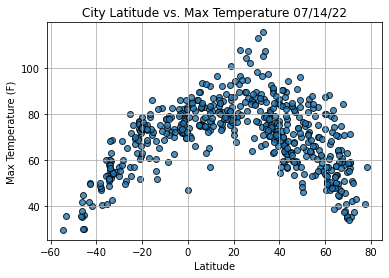

In [114]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

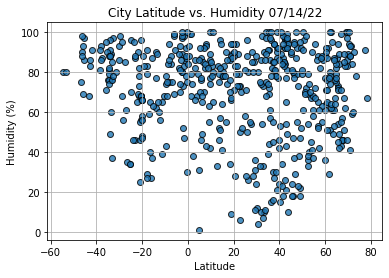

In [115]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

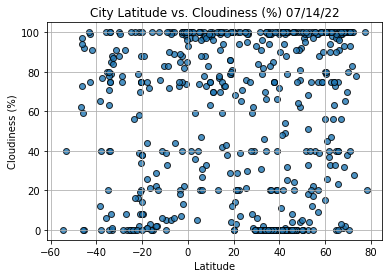

In [116]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

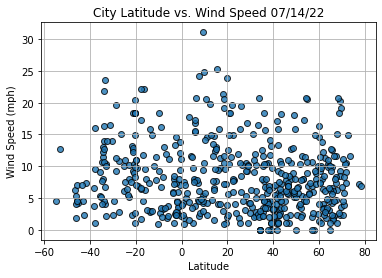

In [117]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [118]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

IndentationError: expected an indented block (755688848.py, line 3)

In [120]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [122]:
index13 = city_data_df.loc[13]
index13

City                  East London
Country                        ZA
Date          2022-07-14 08:47:22
Lat                      -33.0153
Lng                       27.9116
Max Temp                    68.94
Humidity                       37
Cloudiness                      0
Wind Speed                  10.36
Name: 13, dtype: object

In [123]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
520     True
521     True
522     True
523    False
524     True
Name: Lat, Length: 525, dtype: bool

In [124]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vostok,RU,2022-07-14 08:47:19,46.4856,135.8833,67.93,79,100,6.85
2,Albany,US,2022-07-14 08:45:56,42.6001,-73.9662,64.81,92,54,3.18
3,Fort Nelson,CA,2022-07-14 08:42:59,58.8053,-122.7002,58.59,55,75,8.05
4,Merke,KZ,2022-07-14 08:47:20,42.8728,73.1786,89.62,21,0,10.89
5,Tasiilaq,GL,2022-07-14 08:47:20,65.6145,-37.6368,40.17,73,23,4.16
...,...,...,...,...,...,...,...,...,...
519,Thomasville,US,2022-07-14 09:01:27,35.8826,-80.0820,70.41,97,83,4.56
520,Matara,LK,2022-07-14 09:01:28,5.9485,80.5353,84.81,65,27,15.61
521,Santo Tomas,PH,2022-07-14 09:01:28,14.1079,121.1414,84.56,82,91,1.50
522,Tahe,CN,2022-07-14 09:01:28,52.3333,124.7333,70.84,79,99,2.04


In [125]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vostok,RU,2022-07-14 08:47:19,46.4856,135.8833,67.93,79,100,6.85
2,Albany,US,2022-07-14 08:45:56,42.6001,-73.9662,64.81,92,54,3.18
3,Fort Nelson,CA,2022-07-14 08:42:59,58.8053,-122.7002,58.59,55,75,8.05
4,Merke,KZ,2022-07-14 08:47:20,42.8728,73.1786,89.62,21,0,10.89
5,Tasiilaq,GL,2022-07-14 08:47:20,65.6145,-37.6368,40.17,73,23,4.16


In [126]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

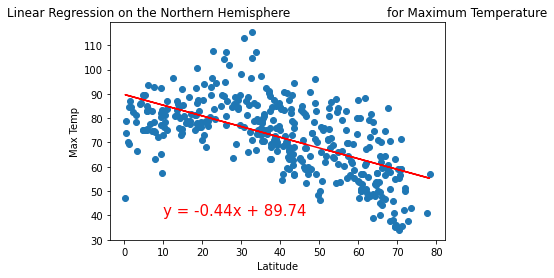

In [127]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

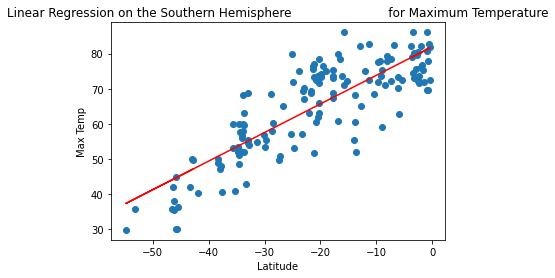

In [128]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

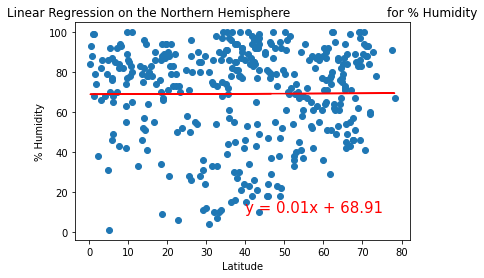

In [130]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

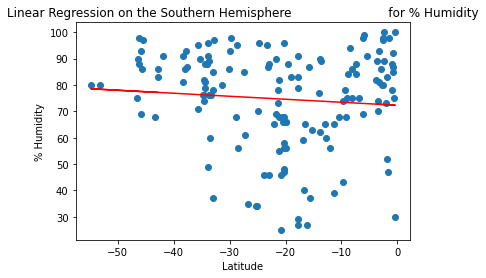

In [131]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

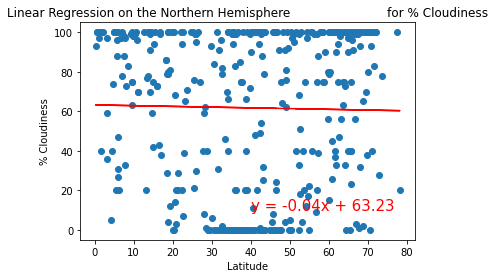

In [132]:
# Linear regression on the Northern Hemipshere for cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

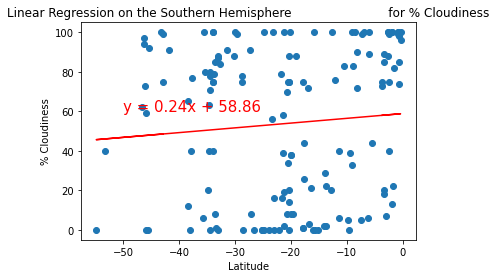

In [133]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

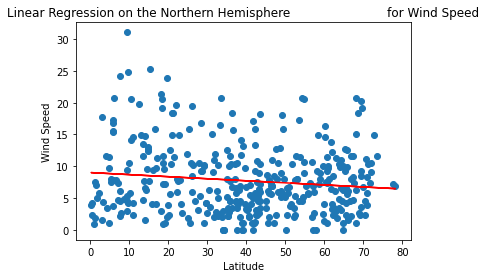

In [134]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

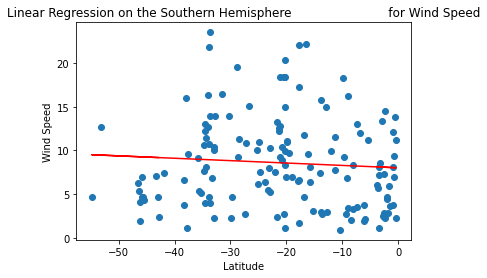

In [135]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))